# My Notebook

##Task1

Our first step is to import our Python libraries

In [1]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Read Excel Table

In [3]:
file_path = r"C:\Users\张周延\Downloads\Pipe_Material_Training_Data.xlsx"
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active
pipe_materials_table = [row for row in sheet.iter_rows(min_row=2, values_only=True)]

Define Function

In [4]:
def plot_cdf_curve_fit(table, material_type, line_color):
    material_data = [row for row in table if row[0] == material_type]
    xdata = np.array([row[1] for row in material_data])
    ydata = np.array([row[2] for row in material_data])

    def cumulative_density_function(age, c, b, a):
        return 1 - c * np.exp(-(age / b) ** a)

    coefficients, bounds = curve_fit(cumulative_density_function, xdata, ydata)
    c, b, a = coefficients
    print(f'Curve fitted CDF for {material_type}: Survival Probability = {c}* e^ (-(age/{b})^{a})')

    x_fit = np.linspace(min(xdata), max(xdata), 100)
    y_fit = cumulative_density_function(x_fit, c, b, a)
    plt.plot(x_fit, y_fit, color=line_color, label=material_type)
    return (c, b, a)

Plot the chart

Curve fitted CDF for Cast Iron: Survival Probability = -101.18515204972081* e^ (-(age/90.2296517496211)^1.7385295488806636)
Curve fitted CDF for Ductile Iron: Survival Probability = -103.04474918465642* e^ (-(age/65.3934144943203)^1.7135618198212315)
Curve fitted CDF for Galvanized Iron: Survival Probability = -126.39516495449556* e^ (-(age/25.926419901386076)^1.4793941371960506)
Curve fitted CDF for Copper: Survival Probability = -107.47743252086387* e^ (-(age/43.83294562977286)^1.6910765551174167)


C:\Users\张周延\AppData\Local\Temp\ipykernel_31288\2195744437.py:7: RuntimeWarning: invalid value encountered in power
  return 1 - c * np.exp(-(age / b) ** a)
C:\Users\张周延\AppData\Local\Temp\ipykernel_31288\2195744437.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  coefficients, bounds = curve_fit(cumulative_density_function, xdata, ydata)


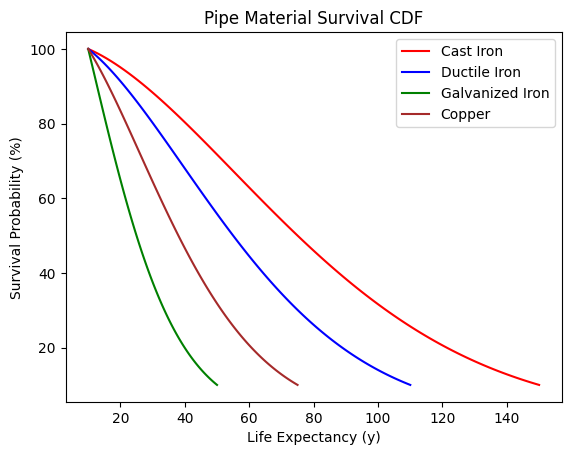

In [5]:
plot_cdf_curve_fit(table=pipe_materials_table, material_type='Cast Iron', line_color='red')
plot_cdf_curve_fit(table=pipe_materials_table, material_type='Ductile Iron', line_color='blue')
plot_cdf_curve_fit(table=pipe_materials_table, material_type='Galvanized Iron', line_color='green')
plot_cdf_curve_fit(table=pipe_materials_table, material_type='Copper', line_color='brown')

plt.legend()
plt.xlabel('Life Expectancy (y)')
plt.ylabel('Survival Probability (%)')
plt.title('Pipe Material Survival CDF')
plt.show()